In [ ]:
#Question 1

Step1:

In [1]:
import pandas as pd
import numpy as np
import io
import requests

step2:
step3:

In [2]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
s=requests.get(url).content
users =pd.read_csv(io.StringIO(s.decode('utf-8')),sep="|")

step4:

In [4]:
av = users.groupby('occupation').mean()
avAge = av['age']
avAge

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

step5:

In [5]:
def conv_gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
users['maleUsers'] = np.where( users['gender'] =='M' ,1,0)
maleRatio = users.groupby('occupation').maleUsers.sum()/users.groupby('occupation').gender.count()
print (maleRatio.sort_values(ascending = False))
    


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


step6:

In [8]:
occGroup = users.groupby('occupation')['age']
print("Minimum Age per",occGroup.min(),"Maximum Age per ",occGroup.max())

Minimum Age per occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64 Maximum Age per  occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


step7:

In [6]:
users.groupby(['occupation', 'gender']).age.mean()


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

step8:

In [9]:
gender_occ_count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occ_count = users.groupby(['occupation']).agg('count')
occ_gender_per = gender_occ_count.div(occ_count, level = "occupation") * 100
occ_gender_per.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

#Question 2

step1:

In [10]:
import numpy as np
import pandas as pd

step2:
step3:

In [11]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
s = requests.get(url).content
euro12 = pd.read_csv(io.StringIO(s.decode('utf-8')),sep=",")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


step4:

In [12]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

step5:

In [13]:
teams = euro12['Team'].count()
print(teams, "Teams participated in the Euro2012")

16 Teams participated in the Euro2012


step6:

In [15]:
columns = len(euro12.axes[1])
print("Number of Columns: ", columns)

Number of Columns:  35


step7:

In [16]:
discipline  = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


step8:

In [17]:
discipline.sort_values(by=['Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


step9:

In [18]:
Yellow_card_mean = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", Yellow_card_mean)

Mean Yellow Cards given per Team: 7.4375


step10:

In [19]:
euro12[euro12['Goals'] > 6 ][['Team','Goals']]

,Team,Goals
5,Germany,10
13,Spain,12


step11:

In [20]:
euro12[euro12['Team'].map(lambda x: x.startswith('G'))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


step12:

In [21]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


step13:

In [22]:
euro12.loc[:, euro12.columns != -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


step14:

In [24]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [ ]:
#Question 3

step1:

In [25]:
import numpy as np
import pandas as pd
import random

step2:

In [33]:
first_series = [[random.randint(1, 4)] for i in range(100)]
df_first = pd.DataFrame(first_series)
df_first

,0
0,4
1,3
2,4
3,1
4,2
...,...
95,2
96,1
97,3
98,3


step2:

In [28]:
sec_series = [[random.randint(1, 3)] for i in range(100)]
df_sec = pd.DataFrame(sec_series)
df_sec

,0
0,2
1,3
2,3
3,3
4,1
...,...
95,1
96,1
97,1
98,3


step2:

In [29]:
third_series = [[random.randint(10000, 30000)] for i in range(100)]
df_third = pd.DataFrame(third_series)
df_third

,0
0,24177
1,10917
2,11602
3,25584
4,14286
...,...
95,13647
96,10456
97,14798
98,13584


step3:

In [30]:
df = pd.concat([df_first, df_sec, df_third], axis=1)
df

,0,0,0
0,1,2,24177
1,4,3,10917
2,3,3,11602
3,3,3,25584
4,2,1,14286
...,...,...,...
95,3,1,13647
96,4,1,10456
97,1,1,14798
98,1,3,13584


step4:

In [31]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,1,2,24177
1,4,3,10917
2,3,3,11602
3,3,3,25584
4,2,1,14286
...,...,...,...
95,3,1,13647
96,4,1,10456
97,1,1,14798
98,1,3,13584


step5:

In [34]:
allThreeColumn = np.concatenate((data1, data2 , data3))
bigcolumn = pd.Series(allThreeColumn)
df["bigcolumn"] = bigcolumn
df

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,1,1,1,1
1,3,3,3,3
2,2,2,2,2
3,2,2,2,2
4,1,1,1,1
...,...,...,...,...
95,3,3,3,3
96,3,3,3,3
97,2,2,2,2
98,1,1,1,1


step6:

In [ ]:
Yes it is true it is going till 99


step7:

In [39]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.
astype(str))
df_new.columns = ['bigcolumn']
df_new = df_new.reset_index(drop=True)
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      111
1      333
2      222
3      222
4      111
      ... 
294    NaN
295    NaN
296    NaN
297    NaN
298    NaN
Name: bedrs, Length: 299, dtype: object

In [ ]:
#Question 4

step1:

In [68]:
import pandas as pa
import numpy as nu

step2:
step3:

In [49]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\s+")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [50]:
data.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


step4:

In [51]:
data["Date"] = panda.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


step5:

In [52]:
data["Date"] = nump.where(panda.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - panda.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


step6:

In [53]:
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

step7:

In [54]:
newData.isnull().values.ravel().sum()

31

step8:

In [56]:
ms = newData.count()
print("There are total ", ms.sum(), " non-missing values.")s

There are total  78857  non-missing values.


step9:

In [57]:
m= newData.mean()
m

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

step10:

In [60]:
def stats(y):
    y = panda.Series(y)
    Min = y.min()
    Max = y.max()
    Mean= y.mean()
    Std = y.std()
    re = [Min,Max,Mean,Std]
    ind= ["Min","Max","Mean","Std"]
    re = panda.Series(re,index=ind)
    return re

step11:

In [61]:
day_stats = newData.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


step12:

In [62]:
Jan_Data = newData[newData.index.month == 1]
Jan_Data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

step13:

In [63]:
print( "Yearly:\n", newData.resample('Y').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

step14:

In [64]:
print("Monthly:\n", newData.resample('M').mean())

Monthly:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.63516

step15:

In [65]:
print("Weekly:\n", newData.resample('W').mean())

Weekly:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.80142

step16:

In [66]:
stats = newData.resample('W').mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
print(stats)

          RPT         VAL         ROS         KIL         SHA         BIR  \
0  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
1    3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
2   24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   
3   12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
4    3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   

          DUB         CLA         MUL         CLO         BEL         MAL  
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
1    2.471429    2.284286    2.262857    1.571429    3.661429    5.124286  
2   20.474286   17.861429   17.460000   17.932857   26.617143   30.374286  
3    9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
4    3.308180    2.853029    2.638349    2.924546    3.757189    4.468526  


In [ ]:
#Question 5

step1:

In [67]:
import pandas as pa
import numpy as np

step2:
step3:

In [77]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
s = requests.get(url).content
chipo = pd.read_csv(io.StringIO(s.decode('utf-8')),sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


step4:

In [80]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


step5:

In [79]:
nof_obv = chipo.shape[0]
print("The number of observations in the dataset", nof_obv)

The number of observations in the dataset 4622


step6:

In [81]:
columns = len(chipo.axes[1])
print("Number of Columns: ", columns)

Number of Columns:  5


step7:

In [82]:
chipo.columnss

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

step8:

In [83]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

step9:

In [84]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


step10:

In [85]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


step11:

In [86]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


step12:

In [87]:
chipo.item_name.count()

4622

step13:

In [88]:
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


step13:

In [89]:
chipo.item_price.dtype

dtype('float64')

step14:

In [90]:
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue is : $ ', revenue)

Revenue is : $  39237.02


step15:

In [91]:
chipo.order_id.value_counts().count()

1834

step16:

In [92]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

step17:

In [96]:
chipo.item_name.value_counts().count()

50

In [ ]:
#question 6

In [147]:
import pandas as panda
import matplotlib.pyplot as plt

In [148]:
df_items = pd.read_csv("usmarriagedivorces.csv")
df_items.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


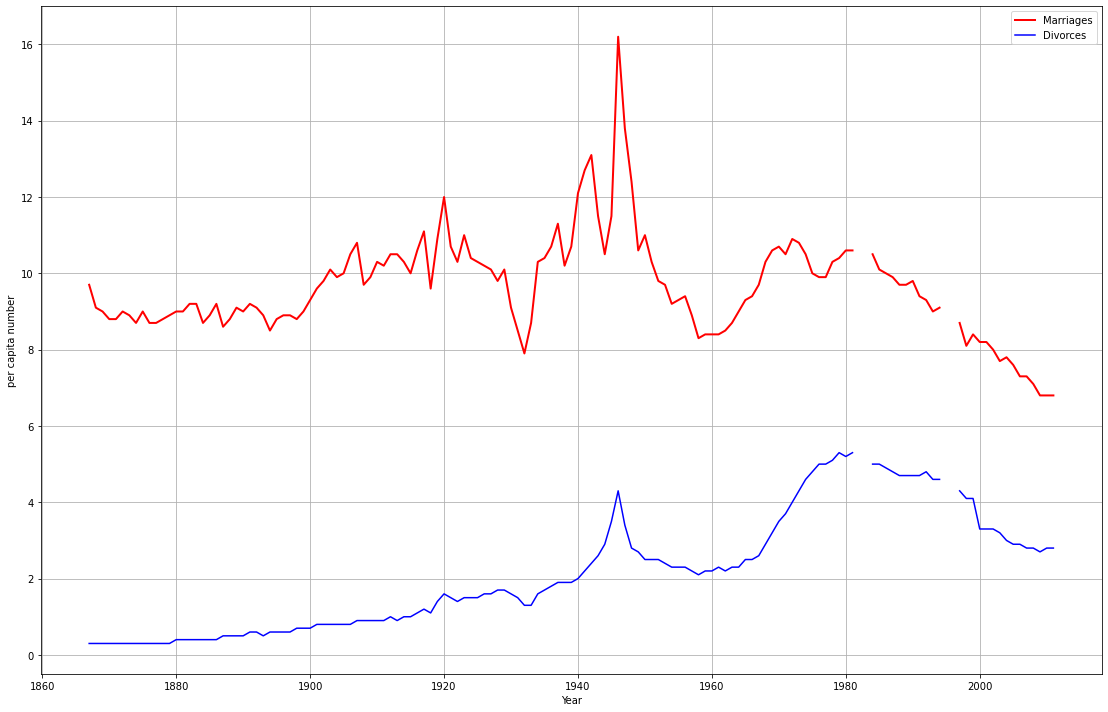

In [149]:
lines = plt.plot(df_items['Year'],df_items['Marriages_per_1000'],df_items['Year'],df_items['Divorces_per_1000'])
plt.ylabel("per capita number")
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = [15.50, 10.00]
plt.rcParams["figure.autolayout"] = True
plt.setp(lines[0], color='r', linewidth=2.0 ,label="Marriages")
plt.setp(lines[1], color='b', label="Divorces")
plt.legend(loc='upper right')
plt.grid()

In [ ]:
#Question 7

In [162]:
import seaborn as sb

C:\Users\Neha\AppData\Local\Temp/ipykernel_13400/2558052688.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(("1900-1950", "1950-2000"))


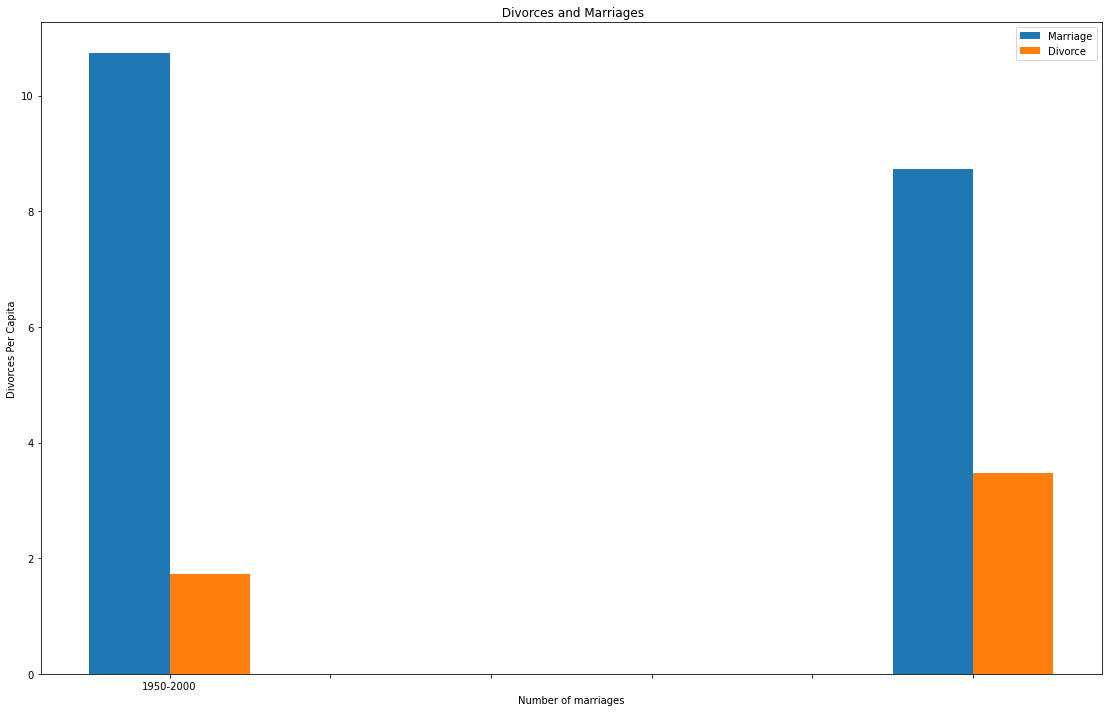

In [167]:
labels = ['1900-1950', '1950-2000']
Marriages = [marriageFirst,marriageSecond]
Divorces = [DivorceFirst,DivorceSecond]
width = 0.1
x = np.arange(len(labels))
fig, ax = plt.subplots()
marr = ax.bar(x - width/2, Marriages, width, label='Marriage')
div = ax.bar(x + width/2, Divorces, width, label='Divorce')
ax.set_ylabel('Divorces Per Capita')
ax.set_xlabel('Number of marriages')
ax.set_title(' Divorces and Marriages')
ax.set_xticklabels(("1900-1950", "1950-2000"))
ax.legend()
fig.tight_layout()
plt.show()

In [ ]:
#Question 8

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
df_items = pd.read_csv("actorkcounts.csv")
df_items.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


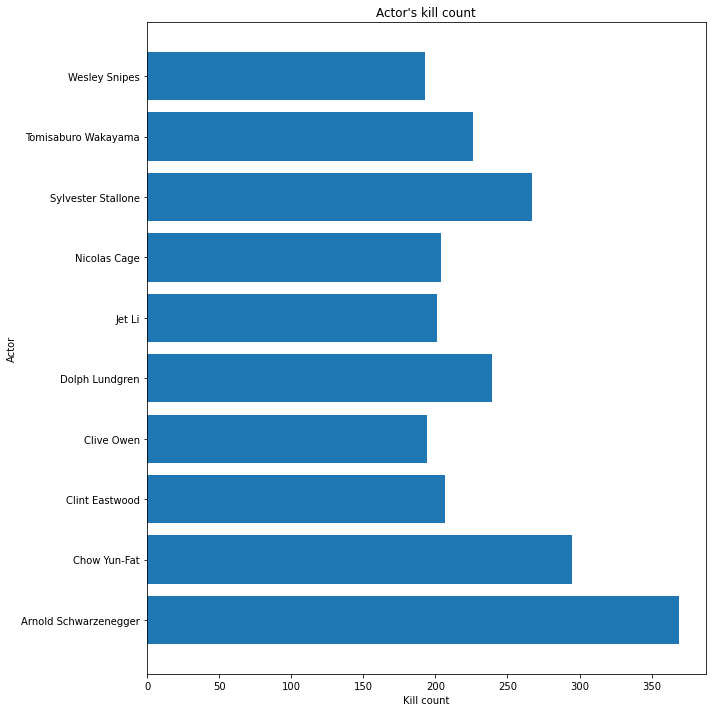

In [160]:
fig= plt.figure(figsize=(10,10))
plt.barh(df_items['Actor'], df_items['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()


In [ ]:
#Question 9

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("romenemperor.csv")
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


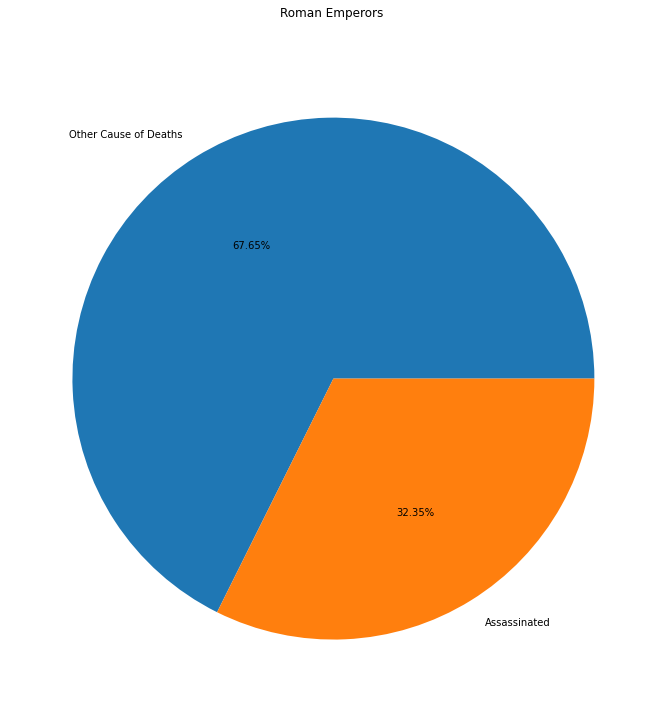

In [144]:

romanData= pd.read_csv('romenemperor.csv')
romanData.head()

lowerData= romanData.where(romanData.Cause_of_Death=="Assassinated").Cause_of_Death.count()
remaining= romanData.Cause_of_Death.count()-lowerData
label=["Other Cause of Deaths","Assassinated"]
plt.pie([remaining,lowerData],labels=label,autopct='%.2f%%')
plt.title("Roman Emperors \n\n")

plt.show()

In [ ]:
#Question 10

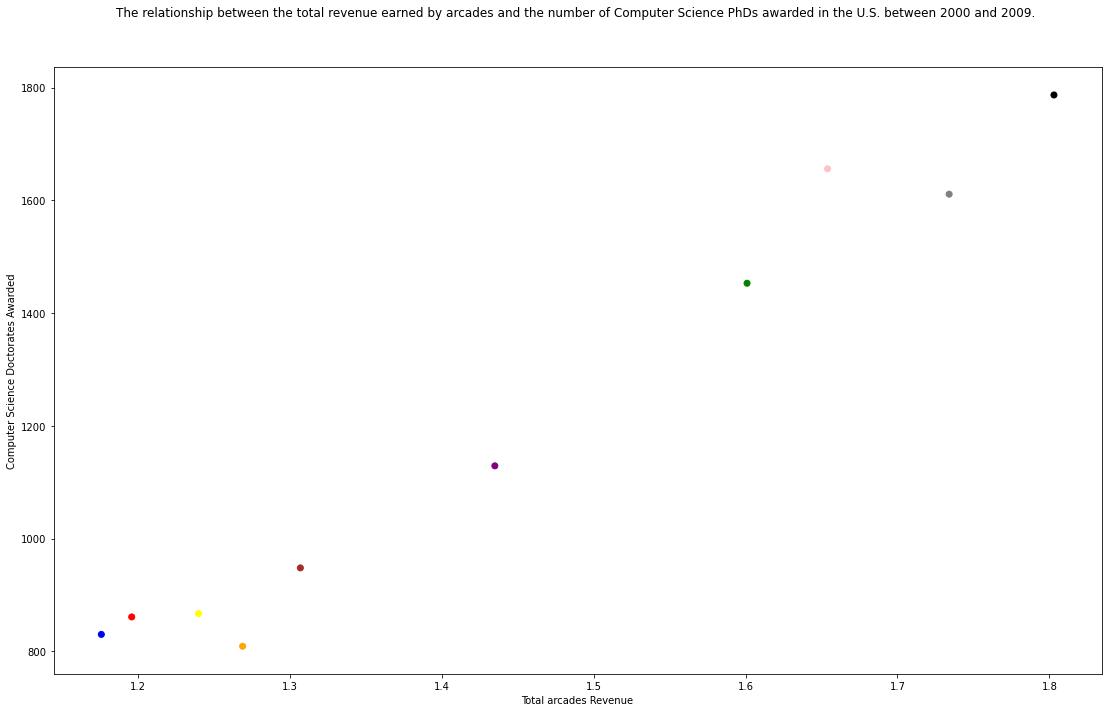

In [161]:
revenueData= pd.read_csv('arevenuevscsdoc.csv')
Years=revenueData.Year
Arcade= revenueData['Total Arcade Revenue (billions)']
PhD=revenueData['Computer Science Doctorates Awarded (US)']


colors=["Red","Blue","Orange","Yellow","Brown","Purple","Green","Pink","Black","Gray"]
plt.scatter(Arcade,PhD,color=colors)

plt.xlabel("Total arcades Revenue")
plt.ylabel("Computer Science Doctorates Awarded")
plt.title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. \n\n\n")
plt.show()